In [23]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and hyperparameter tuning
from sklearn.svm import SVR  # Support Vector Regression model
from sklearn.preprocessing import LabelEncoder  # For label encoding categorical variables
from sklearn.metrics import mean_squared_error  # For evaluating model performance
import joblib  # For saving and loading models


In [20]:
# Read the CSV file containing the data into a pandas DataFrame
df = pd.read_csv('C:\myprojects\civil\data_concrete_temp.csv')

# Convert the 'time' column to string type
df["time"] = df["time"].astype(str)

# Drop rows with missing values
df = df.dropna()

# Reset the index after dropping rows
df = df.reset_index(drop=True)

# Replace categorical time values with numerical representations
df["time"] = df["time"].replace({'0h': 0, '4h': 4, '8h': 8, '12h': 12})

# Convert categorical variables to numerical representations using label encoding
label_encoder = LabelEncoder()
df['grade'] = label_encoder.fit_transform(df['grade'])
df['temp'] = label_encoder.fit_transform(df['temp'])
df['time'] = label_encoder.fit_transform(df['time'])

# Split the data into features (X) and target variable (y)
X = df.drop('strength', axis=1)
y = df['strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\karthik rathod\AppData\Local\Temp\ipykernel_30976\2193603306.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('C:\myprojects\civil\data_concrete_temp.csv')


In [21]:
# Define the Support Vector Regression (SVR) model
svm_regressor = SVR()

# Define the grid of hyperparameters to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Instantiate GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model obtained from the grid search
best_svm_regressor = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_svm_regressor.predict(X_test)

# Evaluate the performance of the best model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error: 23.03245164862531


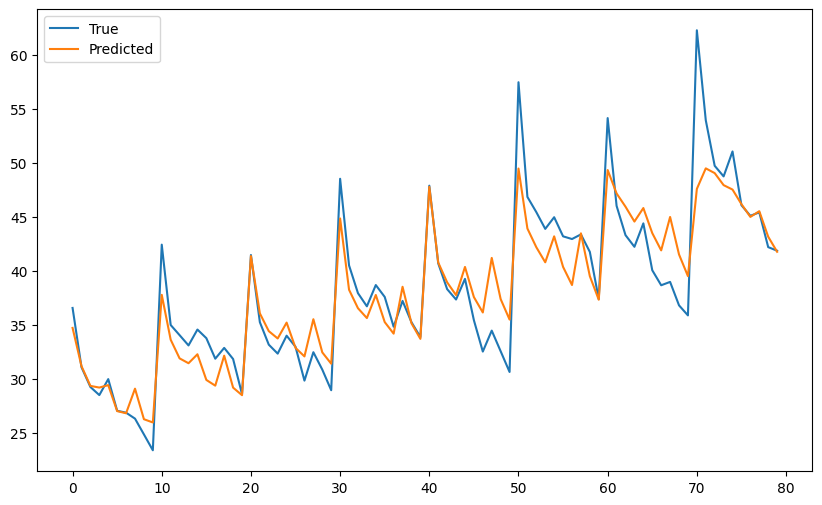

In [22]:
import matplotlib.pyplot as plt  # Importing the matplotlib library for plotting

# Get the predictions using the best model
y_pred = best_svm_regressor.predict(X)  # Making predictions on the input data

# Plot the true and predicted values
plt.figure(figsize=(10, 6))  # Creating a plot with a specified size
plt.plot(y, label='True')  # Plotting the true values
plt.plot(y_pred, label='Predicted')  # Plotting the predicted values
plt.legend()  # Adding a legend to the plot
plt.show()  # Displaying the plot


In [24]:
# Save the best model to a file
joblib.dump(best_svm_regressor, 'svm_best_model_temp.pkl')


['svm_best_model_temp.pkl']